In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [40]:
gdf = gpd.read_file("CHRUN\catchments\catchments.shp")
print("Coordinate System:", gdf.crs)
print("Oringin: Bern (600km, 200km)")
print("Fields:", gdf.columns)
print("HRU: Hydrological Response Unit (Area with same characteristics)")
gdf

Coordinate System: EPSG:21781
Oringin: Bern (600km, 200km)
Fields: Index(['hru', 'geometry'], dtype='object')
HRU: Hydrological Response Unit (Area with same characteristics)


,hru,geometry
0,HSU_001,"POLYGON ((716500 135000, 716268.6 135268.6, 71..."
1,HSU_002,"MULTIPOLYGON (((580000 254000, 580500 254000, ..."
2,HSU_003,"MULTIPOLYGON (((520000 146500, 520000 146000, ..."
3,HSU_004,"POLYGON ((690500 245000, 690730.133 246322.388..."
4,HSU_005,"POLYGON ((688000 206000, 687709.274 206224.403..."
...,...,...
302,HSU_303,"POLYGON ((606000 112500, 603800.079 112882.843..."
303,HSU_304,"POLYGON ((782000 173000, 782208.74 173791.252,..."
304,HSU_305,"POLYGON ((584000 195000, 584000 195500, 583500..."
305,HSU_306,"MULTIPOLYGON (((685000 274000, 684500 274000, ..."


[Text(0, 50000.0, '50 km'),
 Text(0, 100000.0, '100 km'),
 Text(0, 150000.0, '150 km'),
 Text(0, 200000.0, '200 km'),
 Text(0, 250000.0, '250 km'),
 Text(0, 300000.0, '300 km'),
 Text(0, 350000.0, '350 km')]

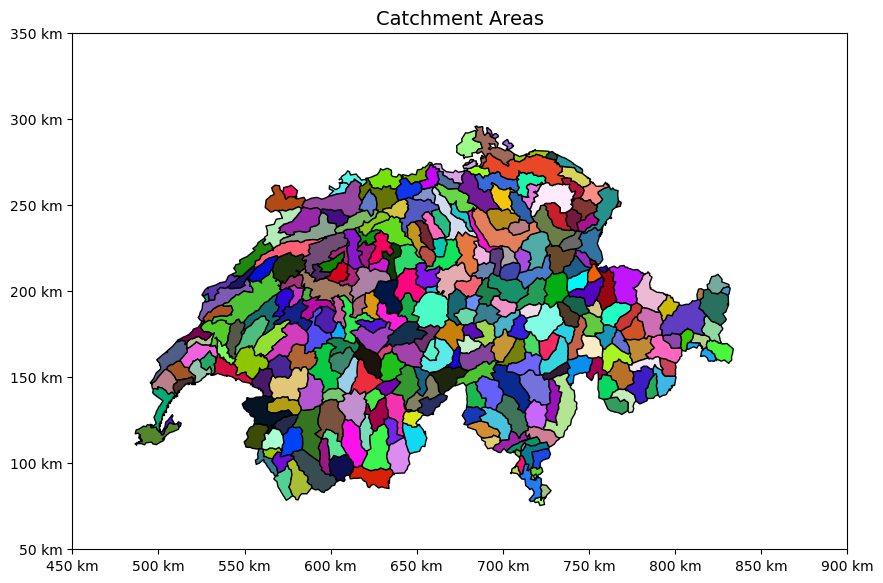

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
color = np.random.rand(len(gdf), 3)
gdf.plot(ax = ax, color = color, edgecolor='black')

plt.title("Catchment Areas", fontsize=14)

x_ticks = ax.get_xticks()
y_ticks = ax.get_yticks()
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels([f"{int(x)} km" for x in x_ticks / 1000])
ax.set_yticklabels([f"{int(y)} km" for y in y_ticks / 1000])

In [44]:
nc_data = xr.open_dataset("CHRUN\chrun.nc")
nc_data

<xarray.Dataset> Size: 111MB
Dimensions:                    (hru: 307, time: 22645)
Coordinates:
  * hru                        (hru) <U7 9kB 'HSU_001' 'HSU_002' ... 'HSU_307'
  * time                       (time) datetime64[ns] 181kB 1962-01-01 ... 202...
Data variables: (12/32)
    P                          (hru, time) float32 28MB ...
    Qmm_mod                    (hru, time) float32 28MB ...
    Qmm_prevah                 (hru, time) float32 28MB ...
    T                          (hru, time) float32 28MB ...
    abb                        (hru) float32 1kB ...
    area                       (hru) float64 2kB ...
    ...                         ...
    frac_wetlands              (hru) float32 1kB ...
    frac_sub_Alpine_meadow     (hru) float32 1kB ...
    frac_alpine_meadow         (hru) float32 1kB ...
    frac_bare_soil_vegetation  (hru) float32 1kB ...
    frac_grapes                (hru) float32 1kB ...
    slp                        (hru) float32 1kB ...
Attributes:
    title:           CH-RUN: A deep-learning-based spatially contiguous runof...
    institution:     IAC, ETH Zurich
    source:          CH-RUN
    comment:         Modeled runoff product (CH-RUN): Qmm_mod, PREVAH runoff:...
    references:      Kraft et al. (2025): CH-RUN: A deep-learning-based spati...
    version_number:  1.0
    contact:         Basil Kraft (basilkraft@env.ethz.ch), Lukas Gudmundsson ...

In [52]:
print(nc_data["frac_urban_areas"].values)

[0.00409417 0.25       0.02331002 0.04608295 0.01785714 0.00663717
 0.         0.         0.04008909 0.05429864 0.0625     0.03108808
 0.0058651  0.00996678 0.01777778 0.0125     0.021875   0.06884058
 0.03351206 0.04697987 0.00803213 0.01799775 0.00358423 0.
 0.         0.16666667 0.03584673 0.         0.         0.00934579
 0.00671141 0.01164021 0.         0.03926097 0.01909959 0.01420455
 0.04471101 0.         0.00144092 0.         0.02285714 0.
 0.         0.         0.05147059 0.03771044 0.046875   0.00296736
 0.0564784  0.04878049 0.02083333 0.00667408 0.         0.00278164
 0.02898551 0.         0.         0.01106501 0.05249344 0.025
 0.00614251 0.00355872 0.0141791  0.         0.00713012 0.00625
 0.00665779 0.00647249 0.         0.04323308 0.02941176 0.00679348
 0.00479616 0.         0.07303371 0.00086655 0.00335946 0.02916667
 0.00209644 0.11367127 0.         0.00719424 0.00442478 0.00541272
 0.         0.05042017 0.         0.00696056 0.05037783 0.
 0.01542416 0.04787234 0.  